In [21]:
import brainsss
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import ants
import matplotlib

In [2]:
template = brainsss.load_fda_meanbrain()

Text(0.5, 1.0, 'this is our template')

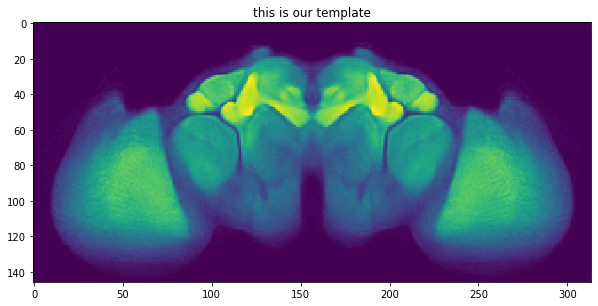

In [56]:
plt.figure(figsize=(10,10))
plt.imshow(template[:,:,55].T)
plt.title('this is our template')

In [83]:
subvol = template[:140,:80,30:50]
subvol = ants.from_numpy(subvol)
subvol.set_spacing((2,2,2))

Text(0.5, 1.0, 'this is a small volume I have cut out of the template')

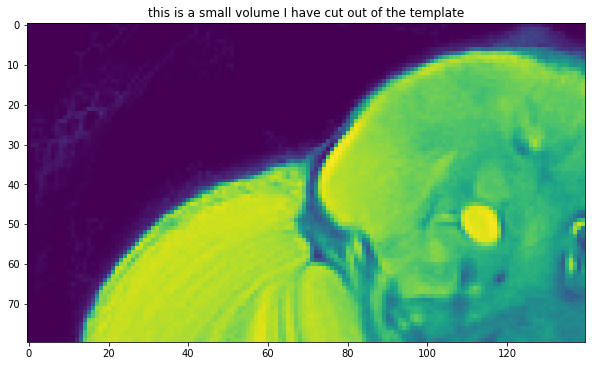

In [84]:
plt.figure(figsize=(10,10))
plt.imshow(subvol[:,:,0].T)
plt.title('this is a small volume I have cut out of the template')

In [85]:
out = ants.registration(fixed=subvol,moving=template,type_of_transform='Translation')

Text(0.5, 1.0, 'this should look like the above subvol, but looks like trash')

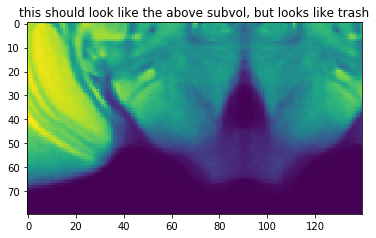

In [86]:
plt.imshow(out['warpedmovout'][:,:,0].T)
plt.title('this should look like the above subvol, but looks like trash')

In [60]:
subvol2template = ants.registration(fixed=template,moving=subvol,type_of_transform='Affine')

Text(0.5, 1.0, 'this should put the subvol in the left upper -ish part of the image, not the middle')

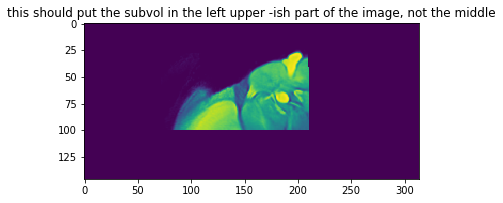

In [61]:
plt.imshow(subvol2template['warpedmovout'][:,:,40].T)
plt.title('this should put the subvol in the left upper -ish part of the image, not the middle')

In [63]:
out = ants.registration(fixed=template,moving=subvol2template['warpedmovout'],type_of_transform='Translation')

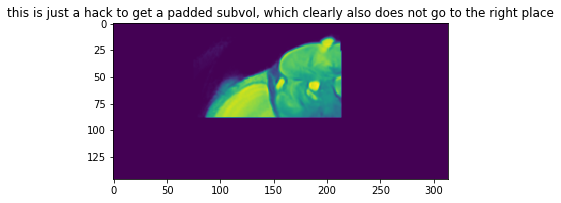

In [66]:
plt.imshow(out['warpedmovout'][:,:,40].T)
plt.title('this is just a hack to get a padded subvol, which clearly also does not go to the right place');

# positive control of single anat registered to template

In [29]:
single_fly = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_134/anat_0/moco/anatomy_channel_1_moc_mean_clean.nii'
single_fly = ants.image_read(single_fly)
single_fly = ants.resample_image(single_fly,(2,2,2),use_voxels=False)

In [33]:
single_fly = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_134/anat_0/moco/anatomy_channel_1_moc_mean_clean.nii'
single_fly = np.asarray(nib.load(single_fly).get_fdata().squeeze(), dtype='float32')
single_fly = ants.from_numpy(single_fly)
single_fly.set_spacing((.6,.6,1))
single_fly = ants.resample_image(single_fly,(2,2,2),use_voxels=False)

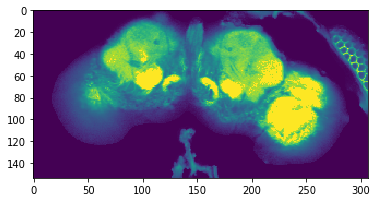

In [34]:
plt.imshow(single_fly[:,:,20].T)

In [36]:
out = ants.registration(fixed=template,moving=single_fly,type_of_transform='Affine')

Text(0.5, 0.65, 'positive control')

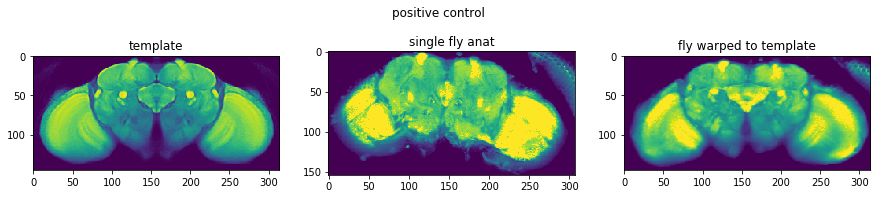

In [45]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
plt.imshow(template[:,:,40].T)
plt.title('template')
plt.subplot(1,3,2)
plt.imshow(single_fly[:,:,40].T)
plt.title('single fly anat')
plt.subplot(1,3,3)
plt.imshow(out['warpedmovout'][:,:,40].T)
plt.title('fly warped to template')
plt.suptitle('positive control',y=.65)

In [2]:
atlas_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/20220301_luke_2_jfrc_affine_20220531_test.nii"
template = ants.image_read(atlas_path)
template = ants.resample_image(template,(2,2,2),use_voxels=False)

In [165]:
atlas_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/20220301_luke_2_jfrc_affine_20220531_test.nii"
template = ants.image_read(atlas_path)
template = template.numpy()#[:,200:,:]
template = ants.from_numpy(template)
template.set_spacing((.38,.38,.38))
template = ants.resample_image(template,(2,2,2),use_voxels=False)

In [214]:
load_directory = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_170/func_10'
brain_file = os.path.join(load_directory, 'imaging/functional_channel_1.nii')
brain = np.asarray(nib.load(brain_file).get_fdata().squeeze(), dtype='float32')
temporal_mean = np.mean(brain,axis=-1)

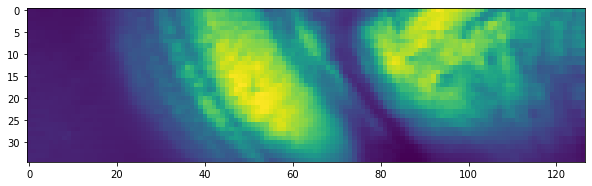

In [215]:
plt.figure(figsize=(10,10))
plt.imshow(temporal_mean.T)

In [240]:
plane = ants.from_numpy(np.repeat(temporal_mean[:,:,np.newaxis],5,axis=-1))
#plane.set_spacing((1.7,1.7,1))
plane.set_spacing((2,2,1))

In [15]:
# plane = ants.from_numpy(temporal_mean[:,:,np.newaxis])
# plane.set_spacing((1.7,1.7,1))
# #plane = ants.resample_image(plane,(2,2),use_voxels=False)

In [52]:
plane

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (127, 35, 5)
	 Spacing    : (1.7, 1.7, 1.0)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

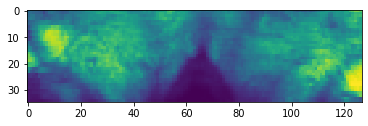

In [26]:
plt.imshow(plane[:,:,0].T)

In [241]:
out = ants.registration(fixed=plane,moving=template,type_of_transform='Translation')

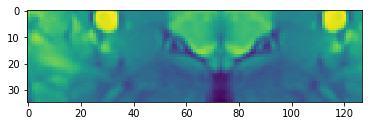

In [242]:
plt.imshow(out['warpedmovout'][:,:,2].T)

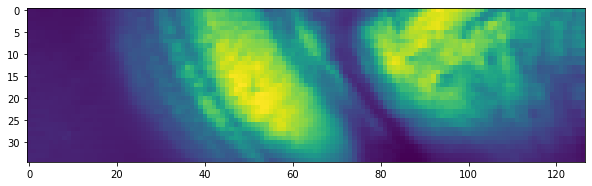

In [235]:
plt.figure(figsize=(10,10))
plt.imshow(temporal_mean.T)

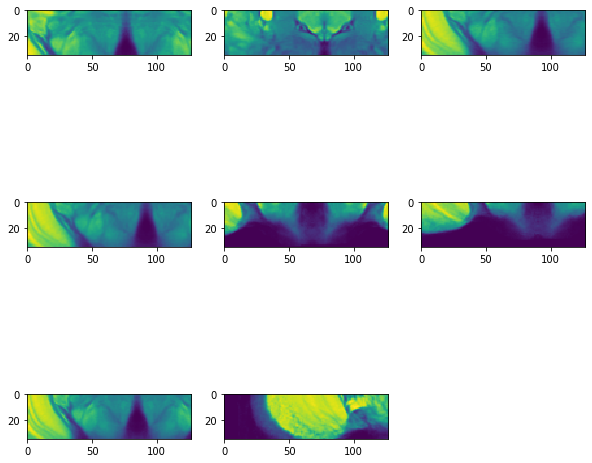

In [251]:
plt.figure(figsize=(10,10))
plane = ants.from_numpy(np.repeat(temporal_mean[:,:,np.newaxis],5,axis=-1))
for i,res in enumerate(np.arange(1.9,2.3,.05)):
    plane.set_spacing((res,res,1))
    out = ants.registration(fixed=plane,moving=template,type_of_transform='Translation',aff_metric='mattes')
    plt.subplot(3,3,i+1)
    plt.imshow(out['warpedmovout'][:,:,2].T)

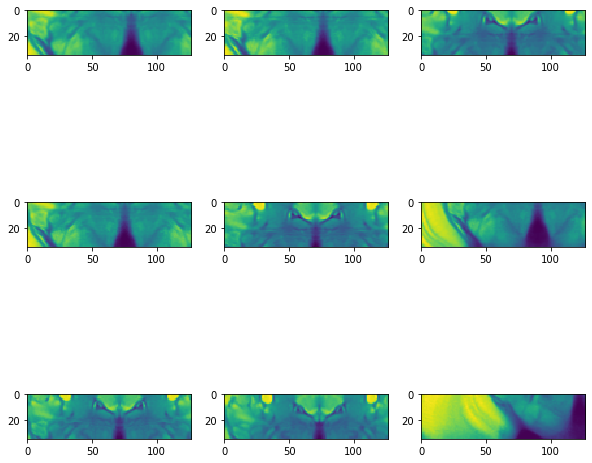

In [246]:
plt.figure(figsize=(10,10))
plane = ants.from_numpy(np.repeat(temporal_mean[:,:,np.newaxis],5,axis=-1))
for i,res in enumerate(np.arange(1.8,2.2,.05)):
    plane.set_spacing((res,res,1))
    out = ants.registration(fixed=plane,moving=template,type_of_transform='Translation')
    plt.subplot(3,3,i+1)
    plt.imshow(out['warpedmovout'][:,:,2].T)

In [198]:
np.argmax(np.max(out['warpedmovout'].numpy(),axis=(0,1)))

55

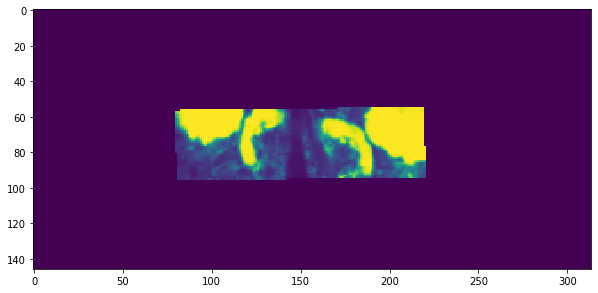

In [199]:
plt.figure(figsize=(10,10))
plt.imshow(out['warpedmovout'][:,:,55].T)

In [186]:
# make alpha channel so can overlay
temp=out['warpedmovout'][:,:,55].T
alpha = np.zeros(temp.shape)
alpha[np.where(temp>0)] = 1
alpha = alpha[:,:,np.newaxis]
temp_norm = Normalize(0, 8066.827)(temp)
rgb = np.repeat(temp_norm[:,:,np.newaxis],3,axis=-1)
overlay = np.concatenate((rgb,alpha),axis=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


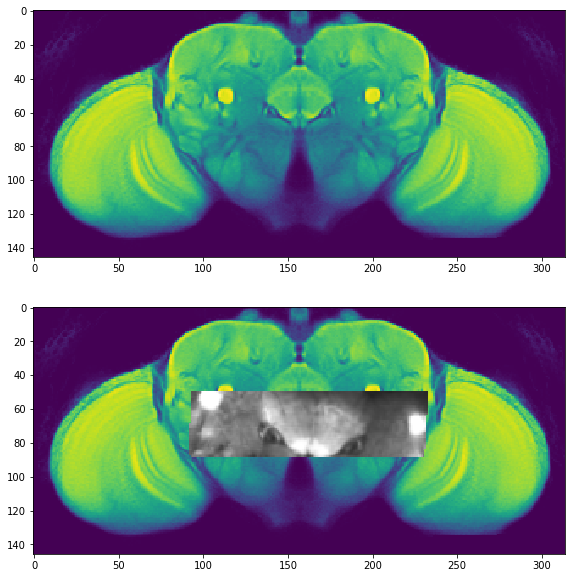

In [187]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.imshow(template[:,:,55].T)
plt.subplot(2,1,2)
plt.imshow(template[:,:,55].T)
plt.imshow(overlay)

In [253]:
template

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (314, 146, 91)
	 Spacing    : (2.0, 2.0, 2.0)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

# positive control

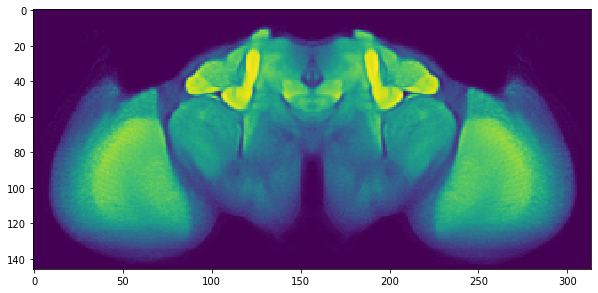

In [256]:
plt.figure(figsize=(10,10))
plt.imshow(template[:,:,40].T)

In [262]:
template

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (314, 146, 91)
	 Spacing    : (2.0, 2.0, 2.0)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [276]:
subvol = template[:140,:80,30:50]
subvol = ants.from_numpy(subvol)
subvol.set_spacing((2,2,2))

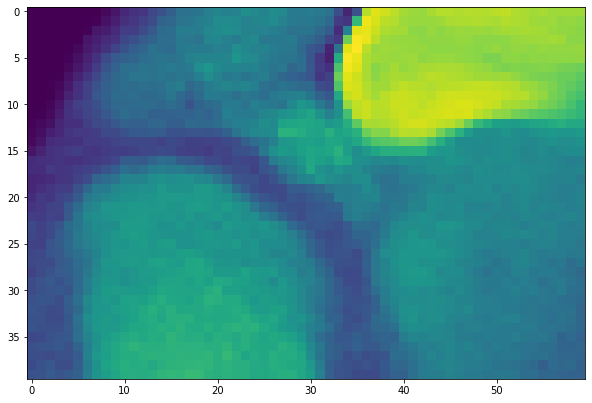

In [261]:
plt.figure(figsize=(10,10))
plt.imshow(subvol[:,:,0].T)

In [280]:
template

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (314, 146, 91)
	 Spacing    : (2.0, 2.0, 2.0)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [279]:
subvol

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (140, 80, 20)
	 Spacing    : (2.0, 2.0, 2.0)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [284]:
out = ants.registration(fixed=template,moving=subvol,type_of_transform='Translation', aff_metric='meansquares')

In [288]:
out = ants.registration(fixed=subvol,moving=template,type_of_transform='Translation')

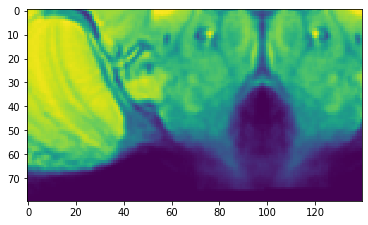

In [290]:
plt.imshow(out['warpedmovout'][:,:,10].T)

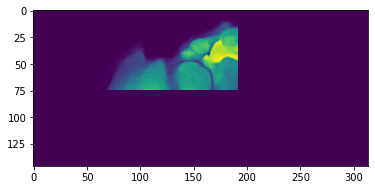

In [287]:
plt.imshow(out['warpedmovout'][:,:,30].T)

In [267]:
# make alpha channel so can overlay
temp=out['warpedmovout'][:,:,40].T
alpha = np.zeros(temp.shape)
alpha[np.where(temp>0)] = 1
alpha = alpha[:,:,np.newaxis]
temp_norm = Normalize(0, 8066.827)(temp)
rgb = np.repeat(temp_norm[:,:,np.newaxis],3,axis=-1)
overlay = np.concatenate((rgb,alpha),axis=2)

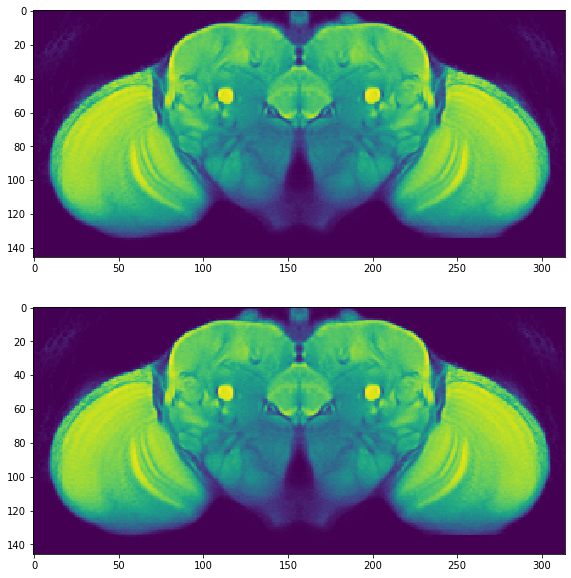

In [268]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.imshow(template[:,:,55].T)
plt.subplot(2,1,2)
plt.imshow(template[:,:,55].T)
plt.imshow(overlay)